In [1]:
import pandas as pd

In [13]:
#Data processing and cleaning

# Load dataset
df = pd.read_csv(r"C:\Users\choud\Downloads\Algerian_forest_fires_cleaned (1).csv")
print("Initial dataset preview:")
print(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values
# If missing values are few, forward fill might work
# Alternatively, you can use median for numeric columns:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            df[col].fillna(method='ffill', inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Convert 'Classes' to binary
# First, check unique classes
print("\nUnique Classes values before mapping:", df['Classes'].unique())

# Map classes
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

# Check for any unmapped classes
if df['Classes'].isnull().sum() > 0:
    print("Warning: Some classes couldn't be mapped to binary, filling with 0.")
    # Method 1: Assign back explicitly
df['Classes'] = df['Classes'].fillna(0)


print("\nDataset after cleaning:")
print(df.head())


Initial dataset preview:
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  

Missing values per column:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Missing values after imputation:
da

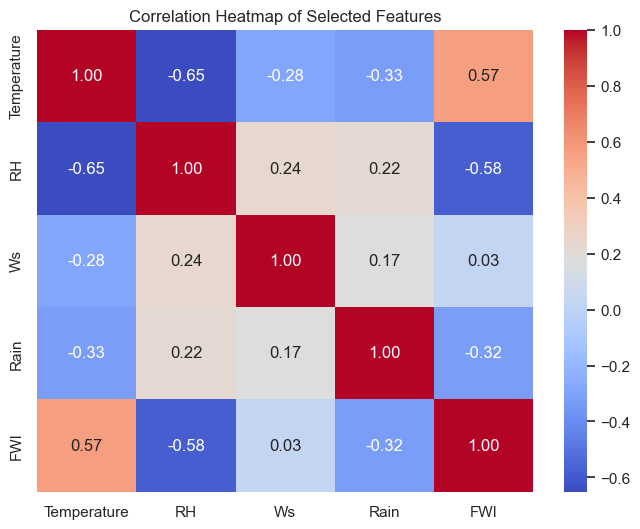

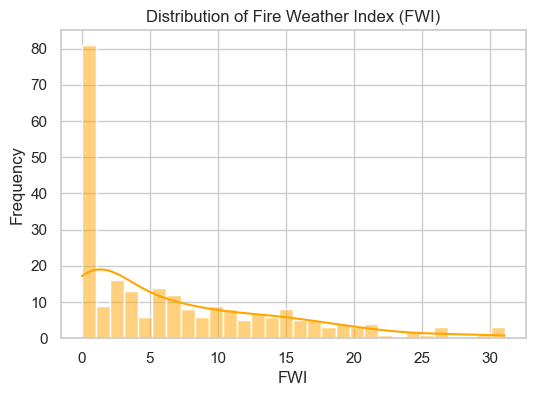

In [17]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = df_selected.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# Observation Example (in Markdown cell):
# "FWI is most strongly correlated with Temperature and Wind Speed (Ws), and negatively with RH."

# Distribution of FWI
plt.figure(figsize=(6, 4))
sns.histplot(df_selected["FWI"], bins=30, kde=True, color="orange")
plt.title("Distribution of Fire Weather Index (FWI)")
plt.xlabel("FWI")
plt.ylabel("Frequency")
plt.show()


In [15]:
#Model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df_selected.drop("FWI", axis=1)
y = df_selected["FWI"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Metrics
print("Linear Regression R² Score:", r2_score(y_test, y_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))


Linear Regression R² Score: 0.29230391433246805
Linear Regression MSE: 21.44915125197453


In [16]:
#Model Evaluation 
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Average R²:", cv_scores.mean())

# Regularization Models
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Ridge R²:", r2_score(y_test, ridge.predict(X_test)))
print("Lasso R²:", r2_score(y_test, lasso.predict(X_test)))


Cross-validated R² scores: [-0.02871805  0.12725473 -0.39751247  0.14651876  0.3540197 ]
Average R²: 0.040312532911991196
Ridge R²: 0.2925335455096377
Lasso R²: 0.2983140324059812
